In [55]:
# Importing neccessary modules for our task

import os
import sys
sys.path.insert(0,'/Users/user/Desktop/Aca/teleco/scripts')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('/Users/user/Desktop/Aca/teleco/scripts')))

In [54]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

In [ ]:
# Importing Script files
from scripts import file
from scripts.user_overview import UserOverview
from scripts import plots

### **Task-1** : User Overview Analysis
In this task we will conduct a user overview analysis to achieve the following sub-tasks: 
*  Identify the top 10 handsets used by the customers.
*  Identify the top 3 handset manufacturers
*  Identify the top 5 handsets per top 3 handset manufacturer
*  Make a short interpretation and recommendation to marketing teams

In [6]:
# loading cleaned Telecom dataset
cleaned_data = pd.read_csv('/Users/user/Desktop/Aca/teleco/data/cleandata_dataset.csv')
cleaned_data.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,13114483460844900352.00,2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9.16456699548519E+015,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00
1,1,13114483482878900224.00,2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00
2,2,13114483484080500736.00,2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,45.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,Samsung,Samsung Galaxy A8 (2018),751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00
3,3,13114483485442799616.00,2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,45.00,5.00,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,undefined,undefined,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00
4,4,13114483499480700928.00,2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,45.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,Samsung,Samsung Sm-G390F,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00


In [7]:
# Instantiate UserOverviewScript class in user_overview

user_overview = UserOverview(cleaned_data)

###### Top 10 handsets used by customers from cleaned_data

In [8]:
# displaying top 10 handest used by customers

top_10_handsets = user_overview.get_top_handsets(10)
pd.DataFrame(top_10_handsets)

,count
Handset Type,
Huawei B528S-23A,19754
Apple iPhone 6S (A1688),9401
Apple iPhone 6 (A1586),9004
undefined,8960
Apple iPhone 7 (A1778),6301
Apple iPhone Se (A1723),5176
Apple iPhone 8 (A1905),4985
Apple iPhone Xr (A2105),4562
Samsung Galaxy S8 (Sm-G950F),4504


In [9]:
# dispalying by index for top 10 handset
top_10_handsets.index

Index(['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)',
       'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)',
       'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)',
       'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)'],
      dtype='object', name='Handset Type')

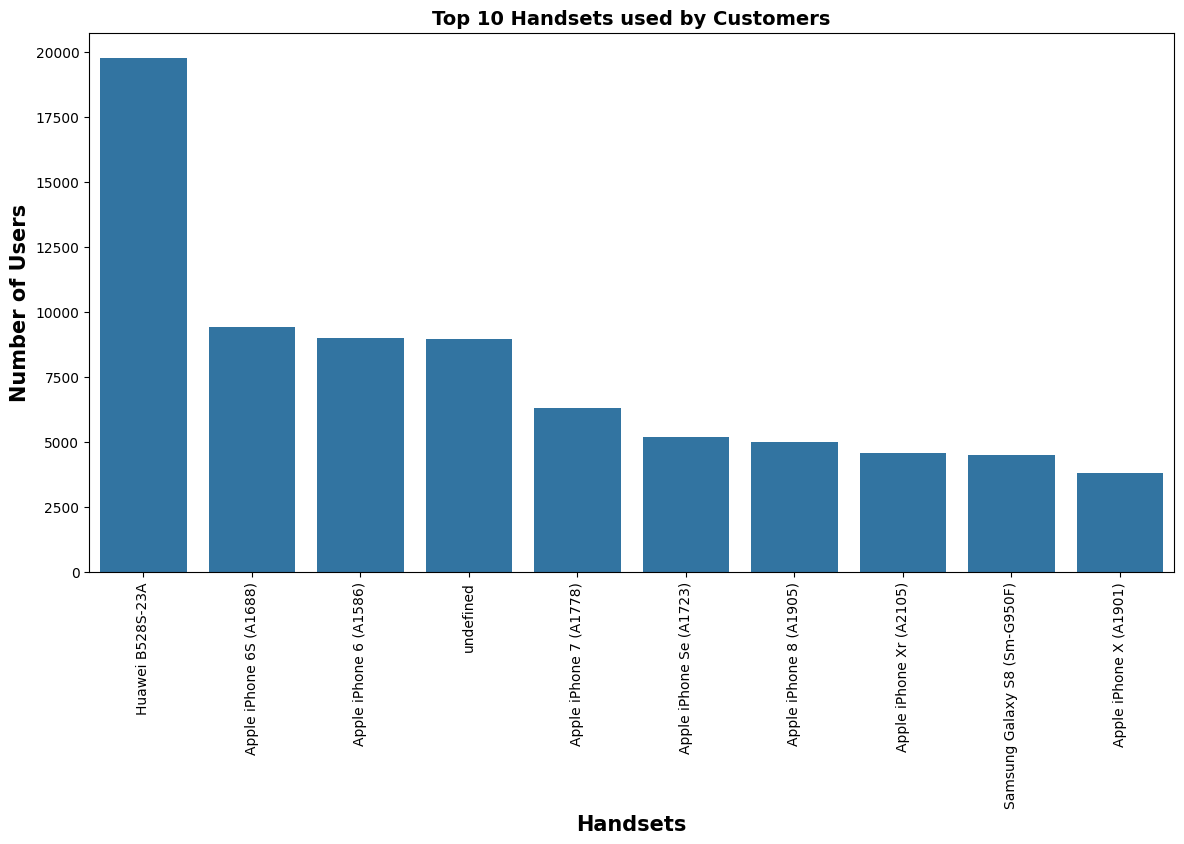

In [10]:
# displaying Bar graph to display the top 10 Handset Types

plt.figure(figsize=(14,7))
sns.barplot(x=top_10_handsets.index, y=top_10_handsets.values)
plt.title('Top 10 Handsets used by Customers', size=14, fontweight="bold")
plt.xlabel('Handsets', size=15, fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel('Number of Users', size=15, fontweight="bold")
plt.show()

### To dispaly top 3 handset manufacturers

In [11]:
# top 3 manufactures used by customers from cleaned_dataset

top_3_manufacturers = user_overview.get_top_manufacturers(3)
pd.DataFrame(top_3_manufacturers)

,count
Handset Manufacturer,
Apple,59442
Samsung,40689
Huawei,34353


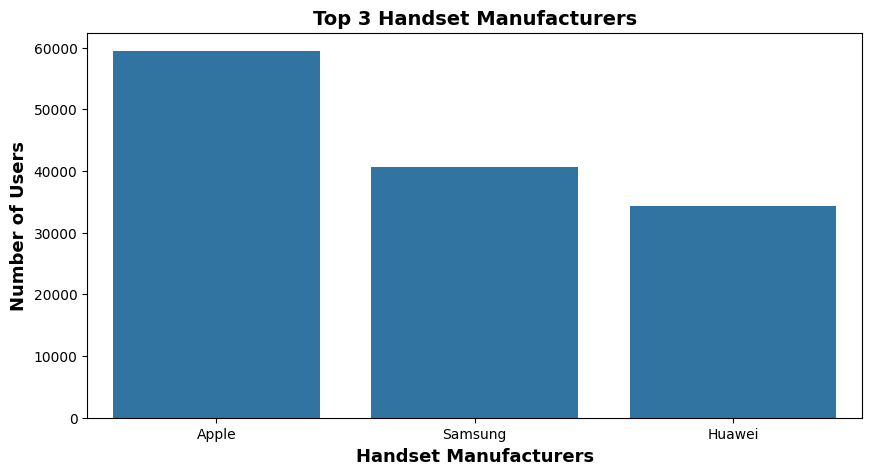

In [12]:
# Bar graph to display the top 3 Handset Manufacturers

plt.figure(figsize=(10,5))
sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values)
plt.title('Top 3 Handset Manufacturers', size=14, fontweight="bold")
plt.xlabel('Handset Manufacturers', size=13, fontweight="bold") 
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()


In [13]:
user_overview.get_handset_group()

>>>> Apple <<<<
Handset Type
Apple iPhone 6S (A1688)    6745
Apple iPhone 6 (A1586)     6246
Apple iPhone 7 (A1778)     4676
Apple iPhone Se (A1723)    3745
Apple iPhone 8 (A1905)     3536
Name: MSISDN/Number, dtype: int64

>>>> Samsung <<<<
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3233
Samsung Galaxy J5 (Sm-J530)     2742
Samsung Galaxy A5 Sm-A520F      2702
Samsung Galaxy J3 (Sm-J330)     2582
Samsung Galaxy S7 (Sm-G930X)    2289
Name: MSISDN/Number, dtype: int64

>>>> Huawei <<<<
Handset Type
Huawei B528S-23A                  10617
Huawei P20 Lite Huawei Nova 3E     1527
Huawei E5180                       1183
Huawei P20                         1106
Huawei Y6 2018                      757
Name: MSISDN/Number, dtype: int64



## Short Interpretation
* Based on the results, Apple is the most preferred manufacturer than samsung anf Huawei from the given dataset. 
* From the apple manufacturer iphone 6s and iphone 6s is handeld by more customers whereas sumsung Galaxy s8 is most popular and 
* therfore I conculded that Huawei B528S-23A is most mobile popular handeld by customers than iphone and sumsung

### **Task 1.1** -  Overview of Users’ Behavior on the Applications

* Aggregate users information based on the following columns:
     * Number of xDR sessions
     * Session duration
     * The total download (DL) and upload (UL) data
     * The total data volume (in Bytes) during this session for each application


In [14]:
# Compute the Total Data usage for each applications

cleaned_data["Social Media (Bytes)"] = cleaned_data["Social Media DL (Bytes)"] + cleaned_data['Social Media UL (Bytes)']
cleaned_data["Google (Bytes)"]       = cleaned_data["Google DL (Bytes)"] + cleaned_data["Google UL (Bytes)"]
cleaned_data['Youtube (Bytes)']      = cleaned_data["Youtube DL (Bytes)"] + cleaned_data["Youtube UL (Bytes)"]
cleaned_data['Netflix (Bytes)']      = cleaned_data["Netflix DL (Bytes)"] + cleaned_data["Netflix UL (Bytes)"]
cleaned_data["Gaming (Bytes)"]       = cleaned_data["Gaming DL (Bytes)"] + cleaned_data["Gaming UL (Bytes)"]
cleaned_data['Email (Bytes)']        = cleaned_data["Email DL (Bytes)"] + cleaned_data["Email UL (Bytes)"]
cleaned_data['Other (Bytes)']        = cleaned_data["Other DL (Bytes)"]+ cleaned_data["Other UL (Bytes)"]
cleaned_data['Total Data (Bytes)']   = cleaned_data['Total UL (Bytes)'] + cleaned_data['Total DL (Bytes)']

### Non-Graphical Univariate Analysis

In [15]:
aggrigate = {"Bearer Id": 'count', 'Dur. (ms)':'sum', 'Total UL (Bytes)': 'sum', 'Total DL (Bytes)': 'sum', 'Total Data (Bytes)': 'sum'}
aggrigation_result = cleaned_data.groupby('MSISDN/Number').agg(aggrigate)
aggrigation_result.head()

,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes)
MSISDN/Number,,,,,
33601001722.00,1,116720.00,36053108.00,842637466.00,878690574.00
33601001754.00,1,181230.00,36104459.00,120755184.00,156859643.00
33601002511.00,1,134969.00,39306820.00,556659663.00,595966483.00
33601007832.00,1,49878.00,20327526.00,401993172.00,422320698.00
33601008617.00,2,37104.00,94280527.00,1363130417.00,1457410944.00


In [16]:
user_app_usage = cleaned_data.copy()

In [17]:
# Convert to MB

user_app_usage["Social Media (MB)"] = user_overview.convert_bytes_to_megabytes(user_app_usage["Social Media (Bytes)"])
user_app_usage["Google (MB)"]       = user_overview.convert_bytes_to_megabytes(user_app_usage["Google (Bytes)"])
user_app_usage['Youtube (MB)']      = user_overview.convert_bytes_to_megabytes(user_app_usage["Youtube (Bytes)"])
user_app_usage['Netflix (MB)']      = user_overview.convert_bytes_to_megabytes(user_app_usage["Netflix (Bytes)"])
user_app_usage["Gaming (MB)"]       = user_overview.convert_bytes_to_megabytes(user_app_usage["Gaming (Bytes)"])
user_app_usage['Email (MB)']        = user_overview.convert_bytes_to_megabytes(user_app_usage["Email (Bytes)"])
user_app_usage['Other (MB)']        = user_overview.convert_bytes_to_megabytes(user_app_usage["Other (Bytes)"])
user_app_usage['Total Data (MB)']    = user_overview.convert_bytes_to_megabytes(user_app_usage["Total Data (Bytes)"]) 

In [18]:
app_columns = ['MSISDN/Number','Social Media (MB)','Google (MB)', 'Youtube (MB)','Netflix (MB)', \
              'Gaming (MB)', 'Email (MB)', 'Other (MB)', 'Total Data (MB)'] 

In [38]:
user_app_behavior = user_app_usage[app_columns].groupby('MSISDN/Number').sum().sample(5)
user_app_behavior

,Social Media (MB),Google (MB),Youtube (MB),Netflix (MB),Gaming (MB),Email (MB),Other (MB),Total Data (MB)
MSISDN/Number,,,,,,,,
33618231532.00,2.94,12.47,40.76,38.23,298.39,1.32,571.02,399.08
33782497340.00,0.86,9.12,36.63,25.24,195.35,0.42,822.01,281.97
33616205424.00,1.65,6.02,41.41,20.62,797.58,2.37,309.10,881.65
33684592356.00,2.96,19.62,30.10,56.61,755.02,5.60,1102.01,891.98
33610421785.00,0.64,6.29,8.71,9.31,191.24,3.26,22.80,233.44


### **Task 1.2** - Exploratory Data Analysis
In this task we will try to identify useful insights, identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

In [39]:
coloumns_to_analyze = ['Dur. (ms)', 'MSISDN/Number', 'Social Media (MB)', 'Google (MB)', 'Youtube (MB)',   
                'Netflix (MB)', 'Gaming (MB)', 'Email (MB)', 'Other (MB)', 'Total Data (MB)']

explore_feature_df = user_app_usage[coloumns_to_analyze]
explore_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149001 entries, 0 to 149000
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dur. (ms)          149001 non-null  float64
 1   MSISDN/Number      149001 non-null  float64
 2   Social Media (MB)  149001 non-null  float64
 3   Google (MB)        149001 non-null  float64
 4   Youtube (MB)       149001 non-null  float64
 5   Netflix (MB)       149001 non-null  float64
 6   Gaming (MB)        149001 non-null  float64
 7   Email (MB)         149001 non-null  float64
 8   Other (MB)         149001 non-null  float64
 9   Total Data (MB)    149001 non-null  float64
dtypes: float64(10)
memory usage: 11.4 MB


In [40]:
# Convert Dur. (ms) to Second and rename the name

explore_feature_df['Dur. (ms)'] = user_overview.convert_ms_to_sec(cleaned_data['Dur. (ms)'])
explore_feature_df.rename(columns = {'Dur. (ms)':'Dur. (sec)'}, inplace=True)

In [41]:
explore_feature_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Dur. (sec),149001.00,29.86,14.24,0.00,22.17,26.40,39.76,60.00
MSISDN/Number,149001.00,41879033849.73,2446901253967.33,33601001722.00,33650997556.00,33663661405.00,33683312636.00,882397108489451.00
Social Media (MB),149001.00,1.83,1.04,0.00,0.93,1.83,2.73,3.65
Google (MB),149001.00,7.81,3.52,0.04,4.94,7.81,10.68,15.53
Youtube (MB),149001.00,22.64,9.25,0.08,15.99,22.66,29.30,45.19
Netflix (MB),149001.00,22.63,9.26,0.10,15.98,22.64,29.29,45.20
Gaming (MB),149001.00,430.38,244.05,0.31,218.77,431.67,641.52,859.20
Email (MB),149001.00,2.26,1.07,0.01,1.36,2.26,3.16,4.52
Other (MB),149001.00,429.41,243.24,0.15,218.69,430.00,639.93,859.52
Total Data (MB),149001.00,495.81,244.41,28.96,284.54,496.96,706.60,955.98


In our data cleaning and preprocessing step, every null values are treated in some way accordingly. Based on the skewness vaue, numerical datas are filled either mean or median. In the other case, categorical datas are filled with the column mode value. 

In [23]:
# Check any missing values
explore_feature_df.isnull().values.any()

False

In [24]:
# Total number of missing values
explore_feature_df.isnull().sum().sum()

0

### Univariant Analysis
Analysis of a single variable.

<Figure size 900x700 with 0 Axes>

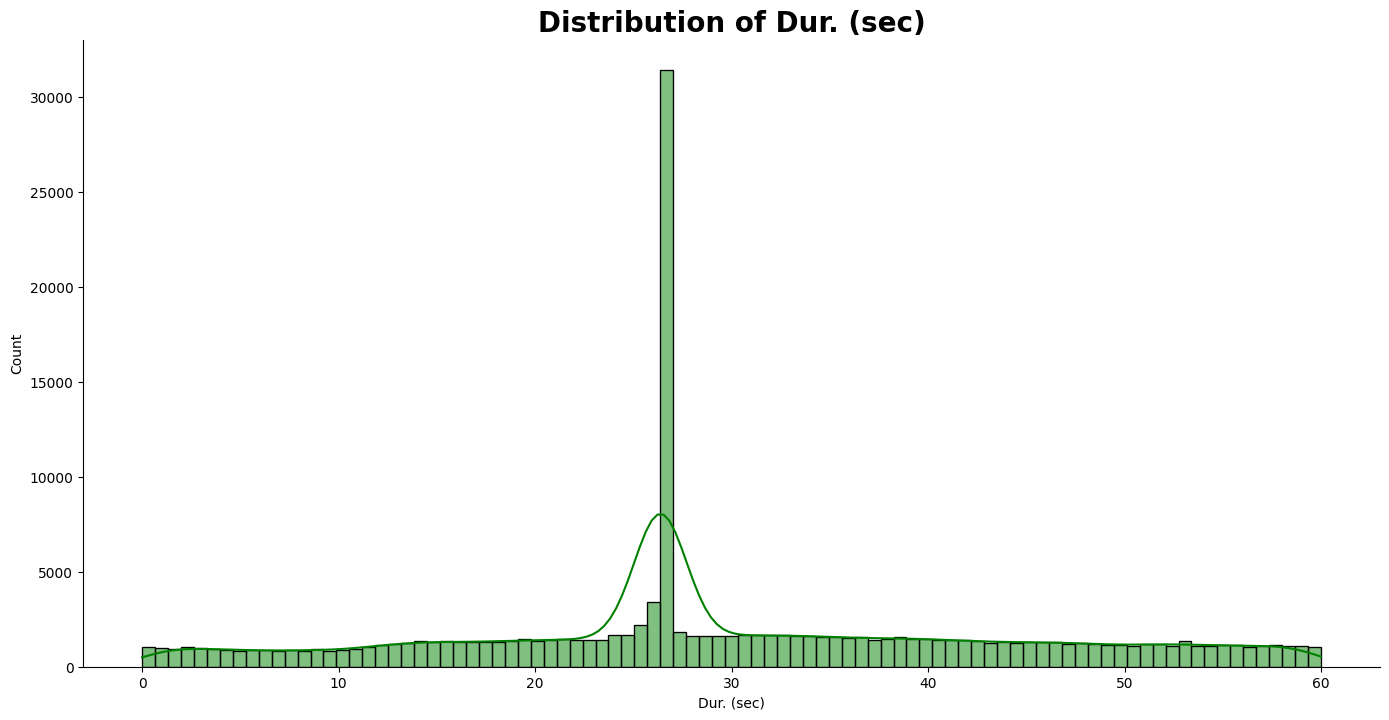

In [25]:
plots.hist(explore_feature_df, 'Dur. (sec)', 'green') 

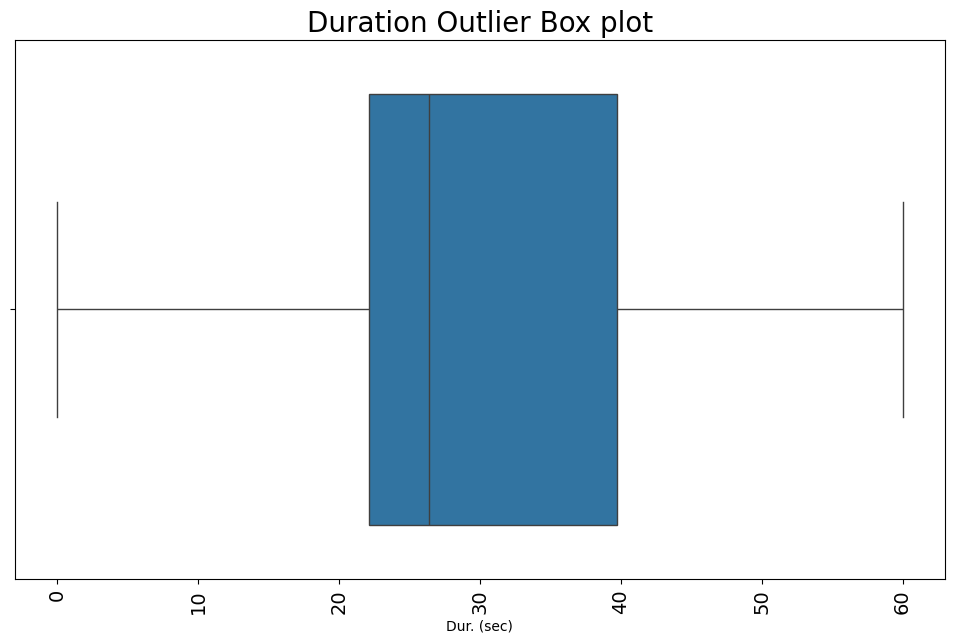

In [26]:
plots.box_plot(explore_feature_df, 'Dur. (sec)', 'Duration Outlier Box plot')

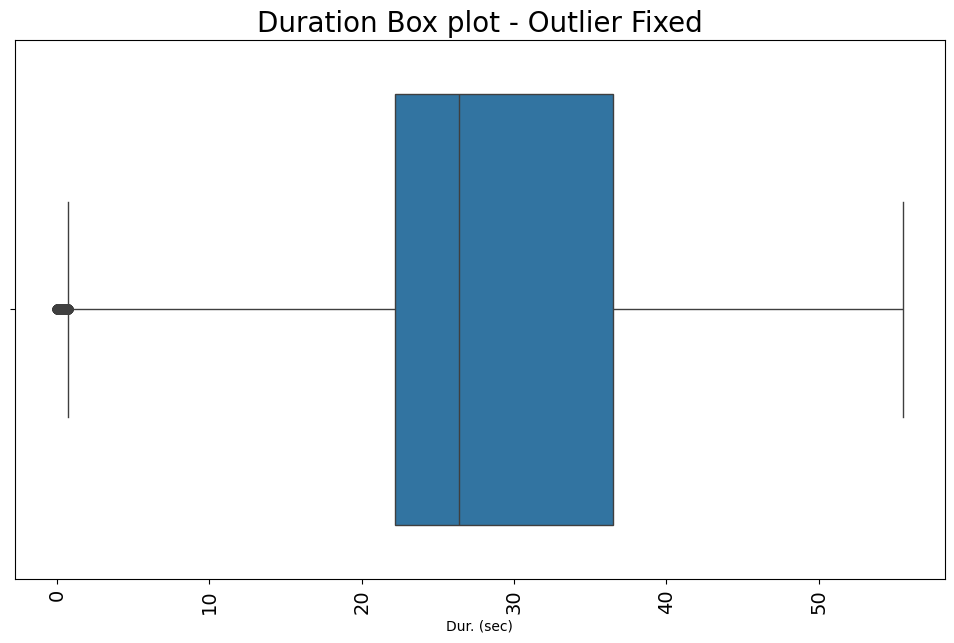

In [27]:
# Fix Duration outliers using quantile method

explore_feature_df["Dur. (sec)"] = plots.fix_outlier(explore_feature_df, "Dur. (sec)")
plots.box_plot(explore_feature_df, 'Dur. (sec)', 'Duration Box plot - Outlier Fixed')

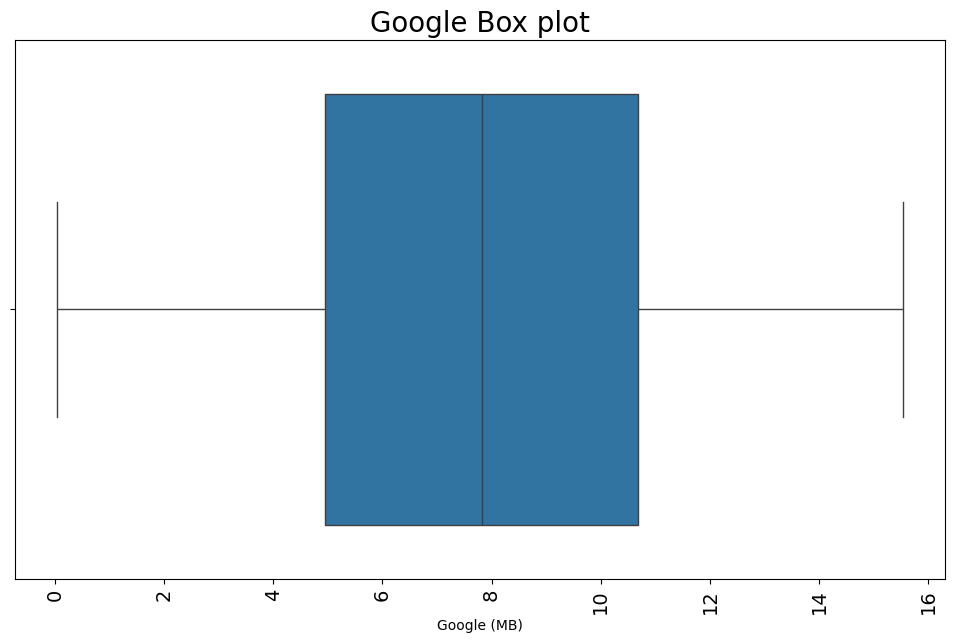

In [28]:
# Google Box ploting

plots.box_plot(explore_feature_df, 'Google (MB)', 'Google Box plot')

<Figure size 900x700 with 0 Axes>

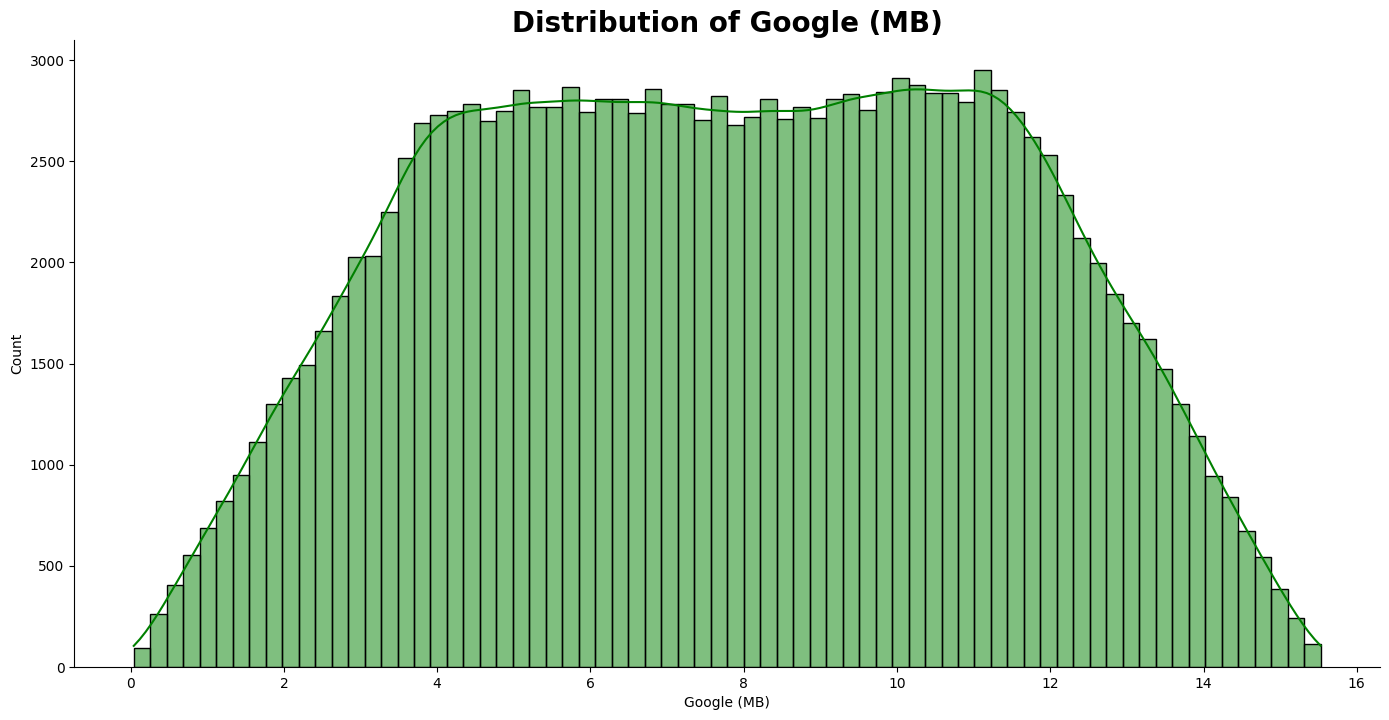

In [29]:
# Google users distribution

plots.hist(explore_feature_df, 'Google (MB)', 'green')

<Figure size 900x700 with 0 Axes>

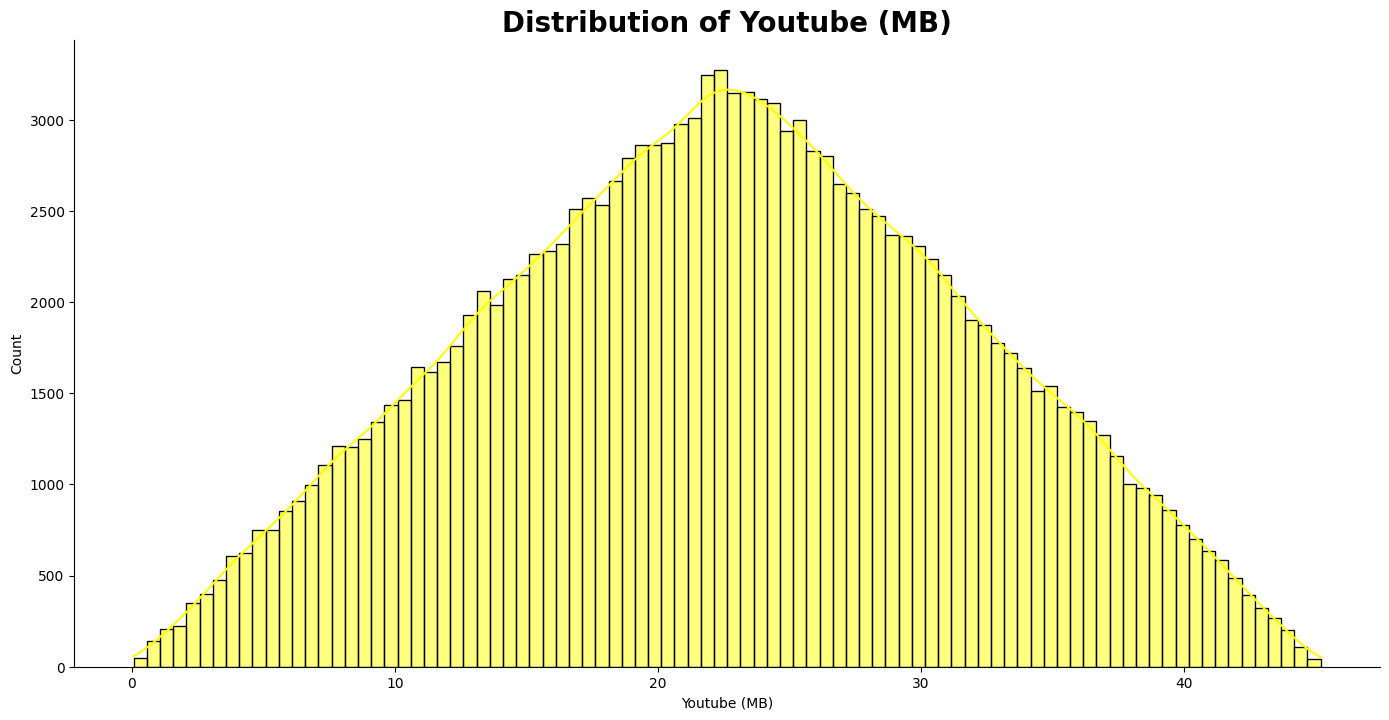

In [30]:
# Google users distribution

plots.hist(explore_feature_df, 'Youtube (MB)', 'yellow')

<Figure size 900x700 with 0 Axes>

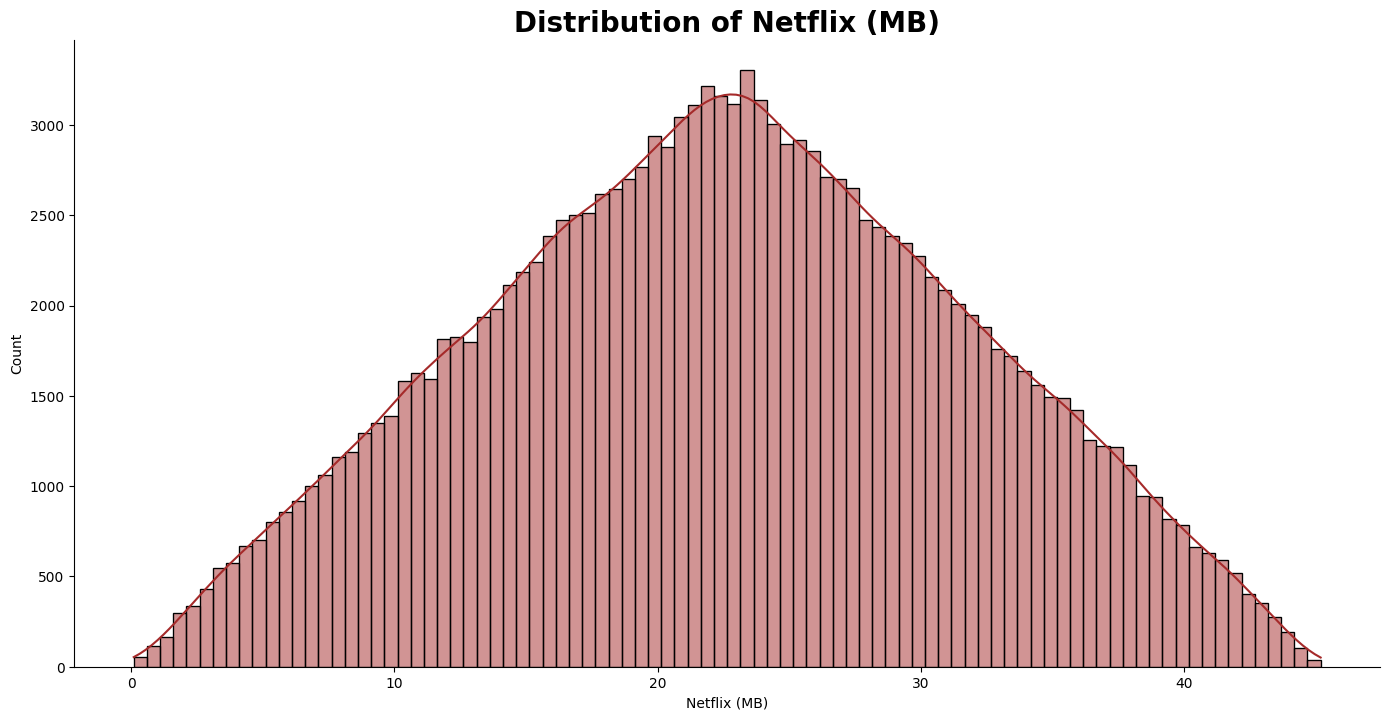

In [31]:
plots.hist(explore_feature_df, 'Netflix (MB)', 'brown')

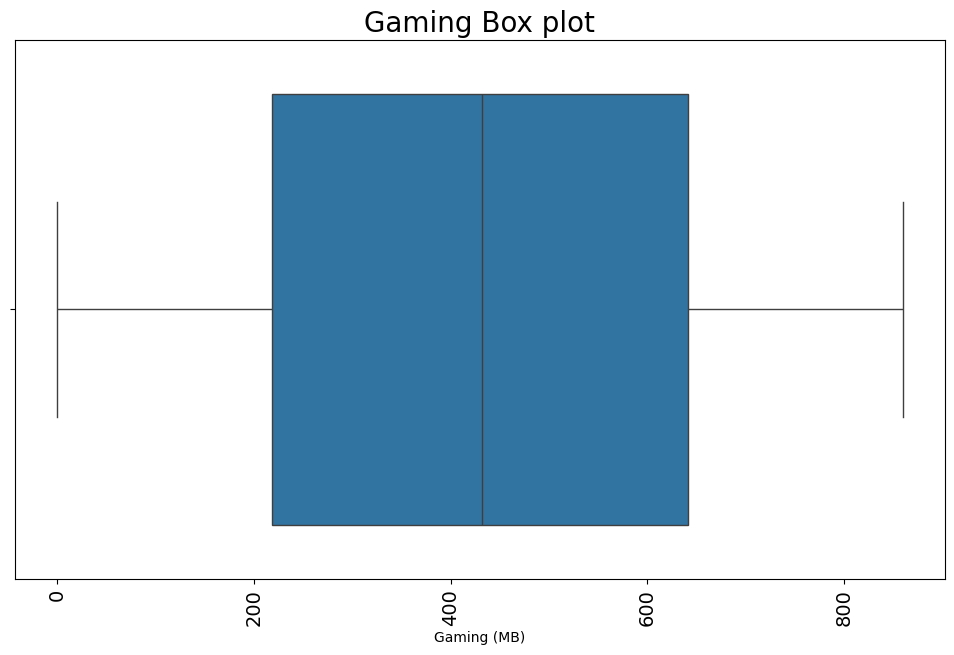

In [32]:
# Gaming Box ploting

plots.box_plot(explore_feature_df, 'Gaming (MB)', 'Gaming Box plot')

<Figure size 900x700 with 0 Axes>

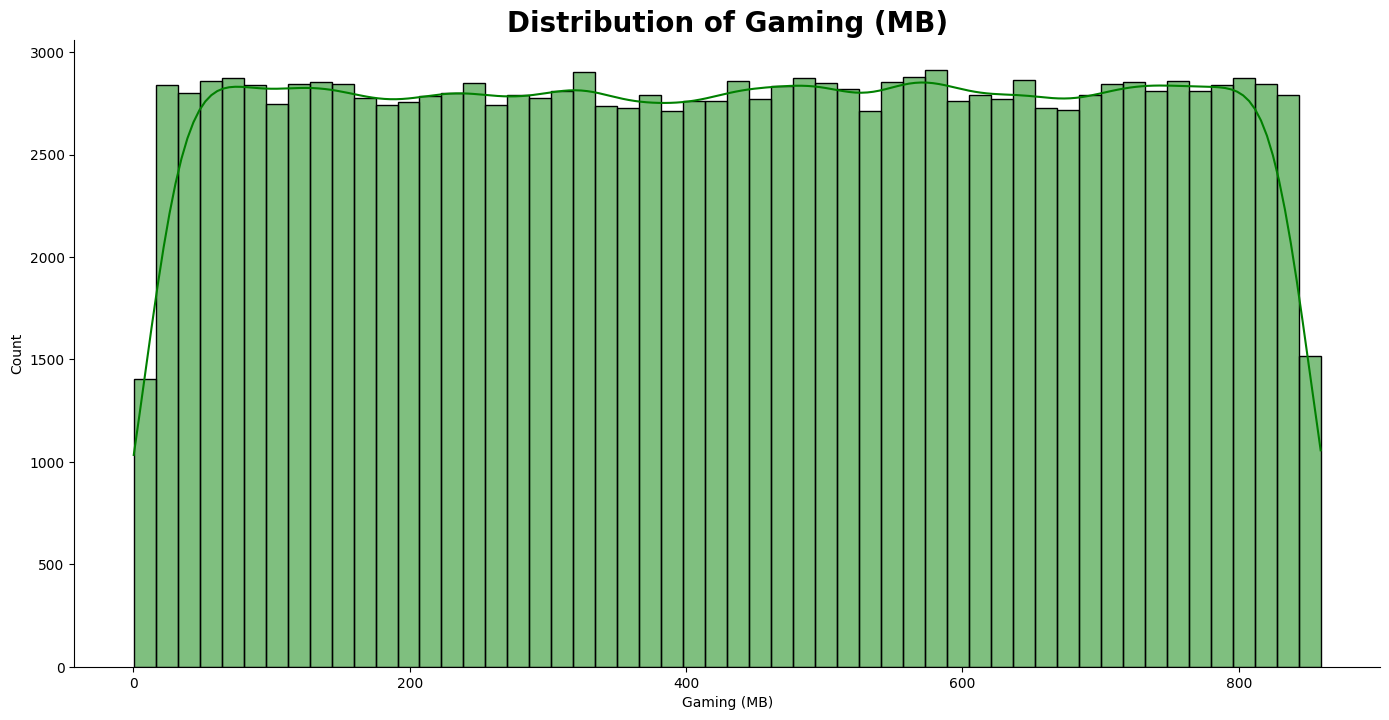

In [33]:
plots.hist(explore_feature_df, 'Gaming (MB)', 'green')

<Figure size 900x700 with 0 Axes>

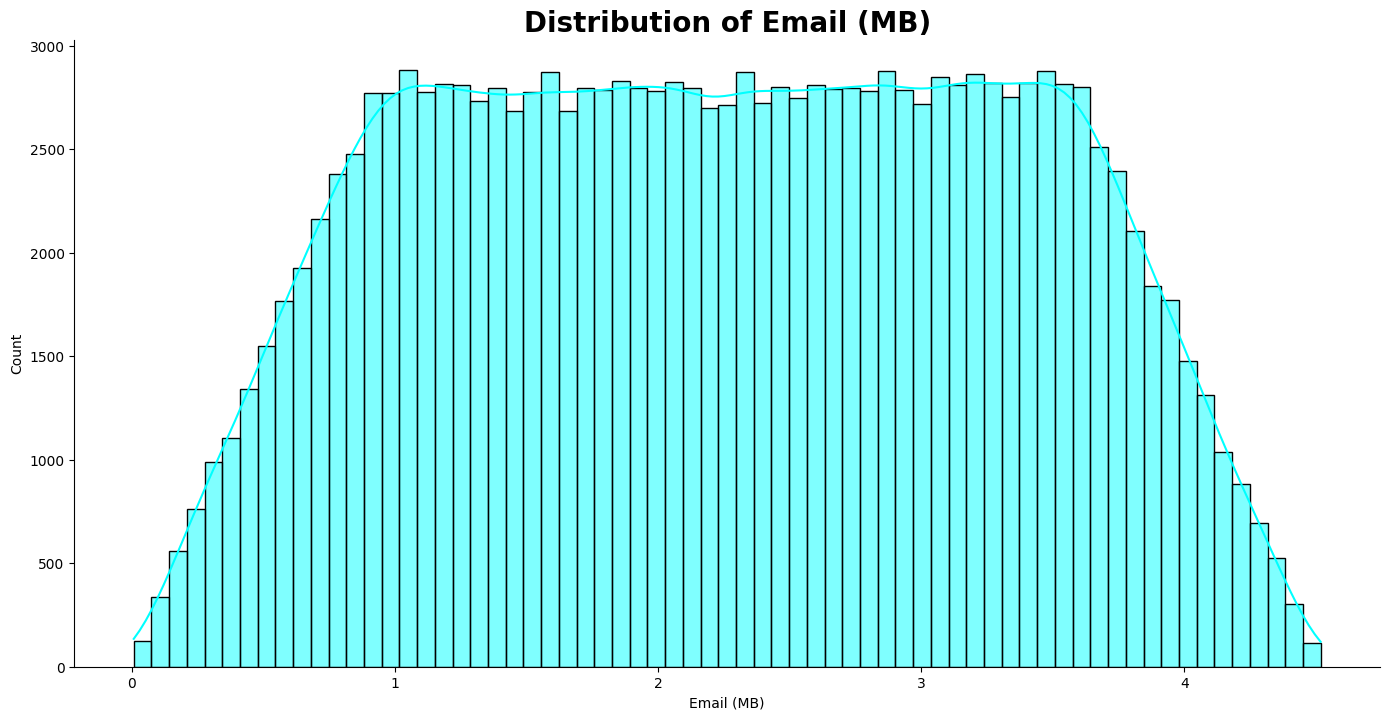

In [34]:
plots.hist(explore_feature_df, 'Email (MB)', 'cyan')

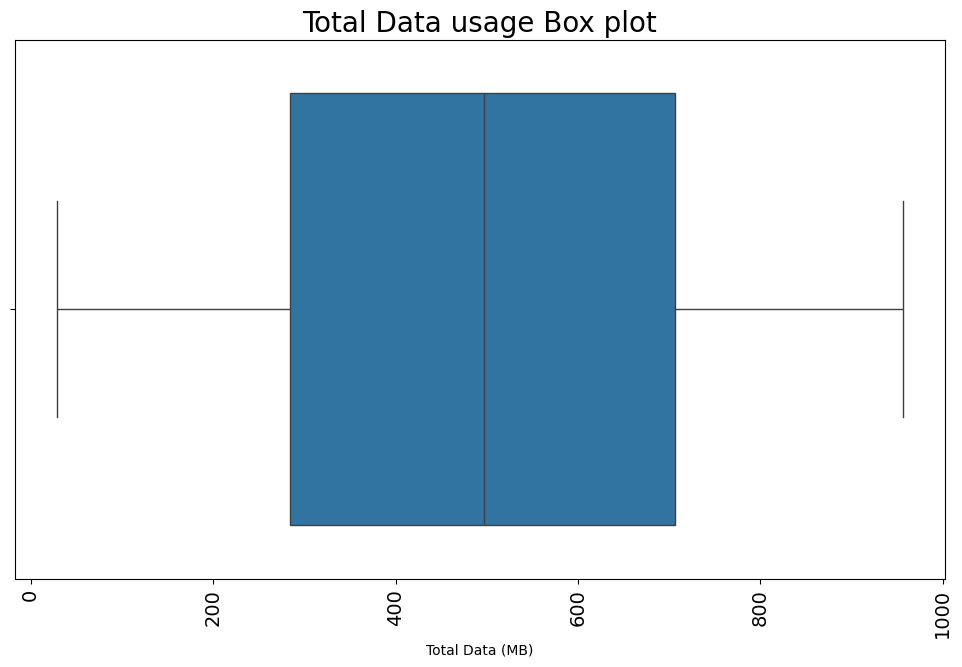

In [35]:
# Total Data Box ploting

plots.box_plot(explore_feature_df, 'Total Data (MB)', 'Total Data usage Box plot')

<Figure size 900x700 with 0 Axes>

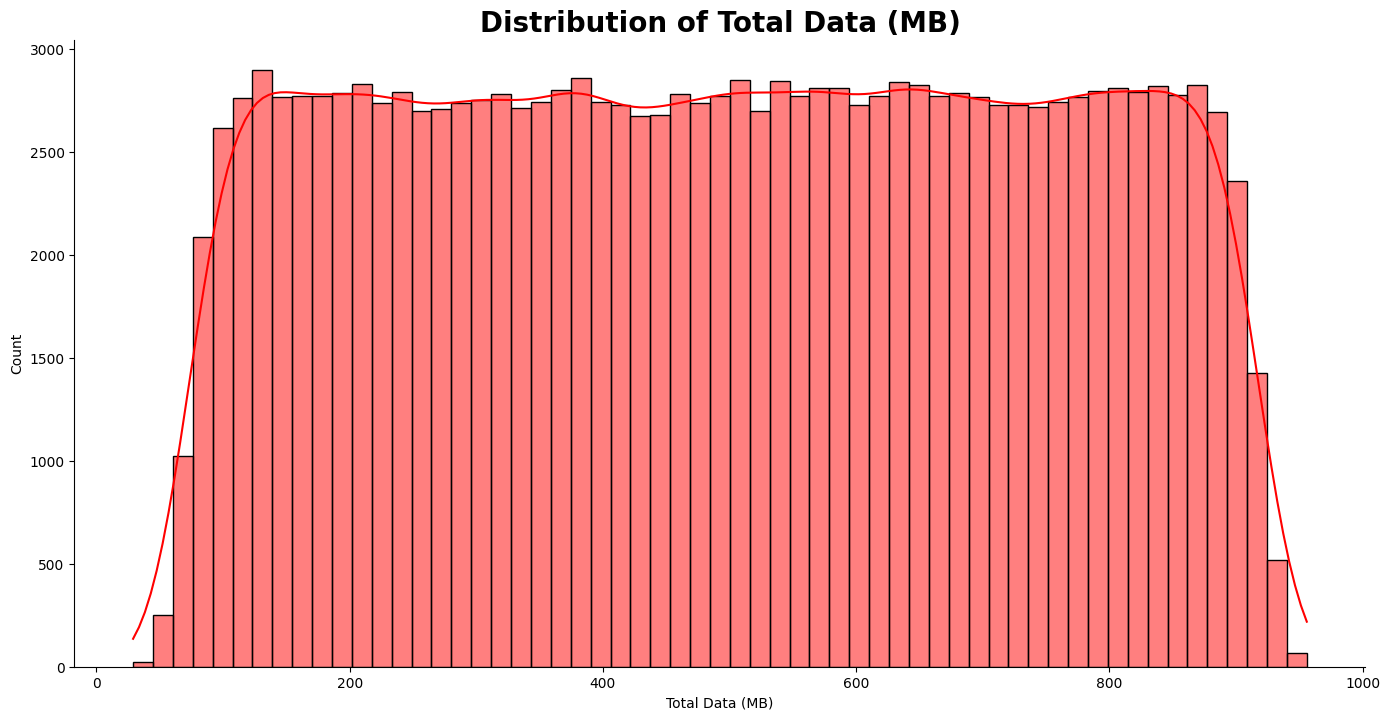

In [36]:
plots.hist(explore_feature_df, 'Total Data (MB)', 'red')

### Bivariant Analysis
Analysis of two columns where we look for relationships between two columns and how our data is distributed amoung them.

In [37]:
user = explore_feature_df.groupby('MSISDN/Number').sum()

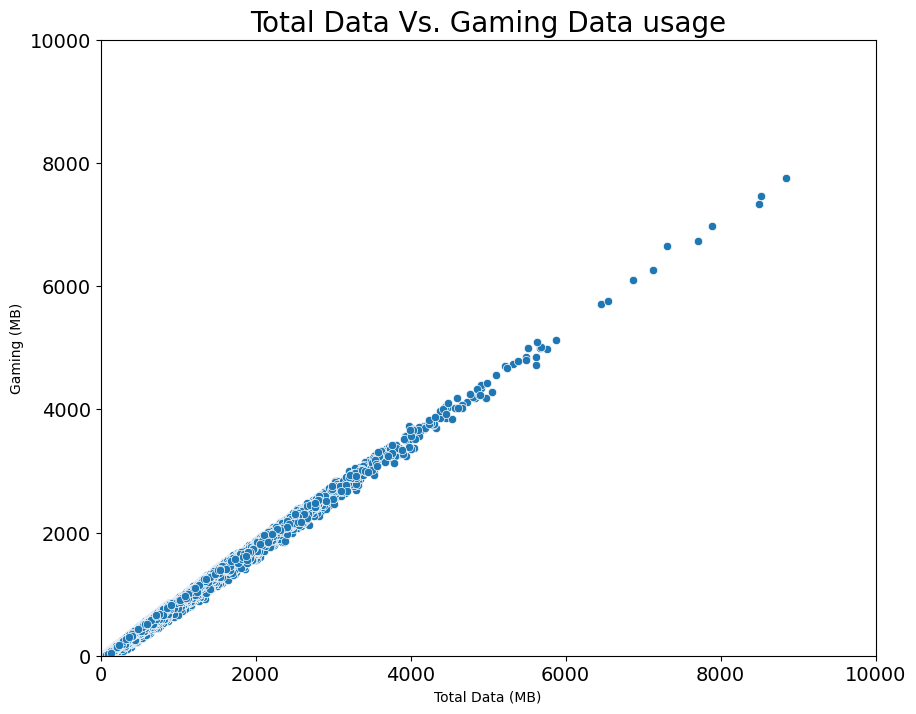

In [42]:
plots.plot_scatter(user, 'Total Data (MB)', 'Gaming (MB)', 'Total Data Vs. Gaming Data usage', None, None)

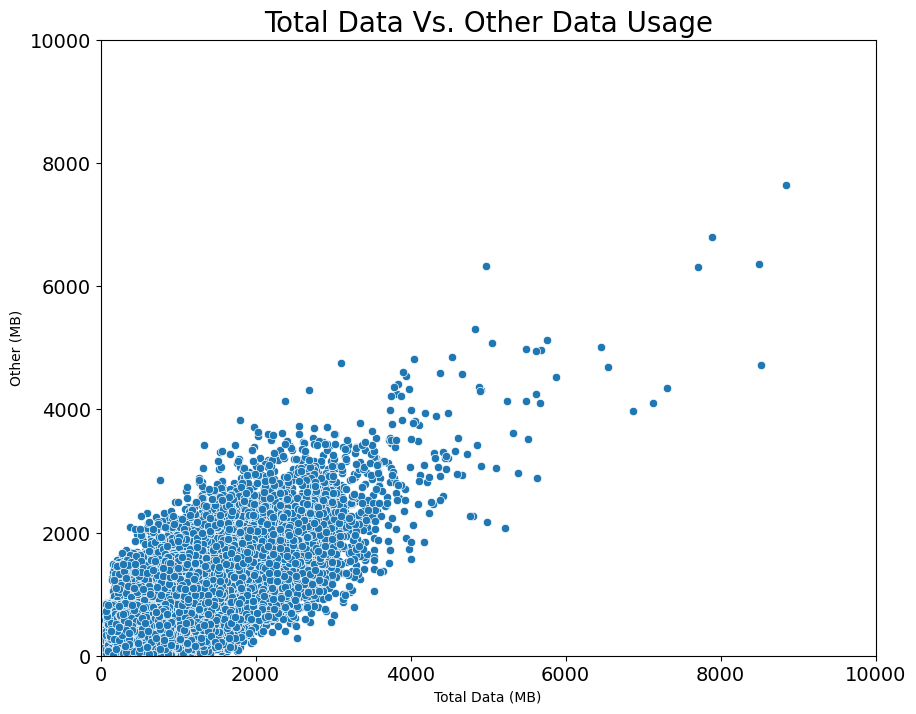

In [43]:
plots.plot_scatter(user, 'Total Data (MB)', 'Other (MB)', 'Total Data Vs. Other Data Usage', None, None)

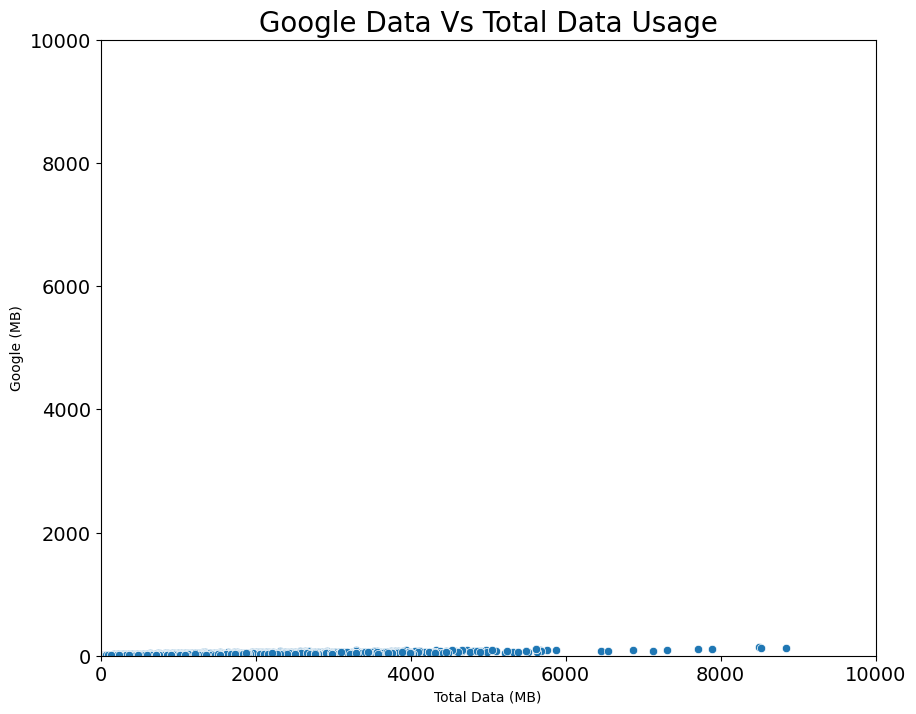

In [44]:
plots.plot_scatter(user, 'Total Data (MB)', 'Google (MB)', 'Google Data Vs Total Data Usage', None, None)

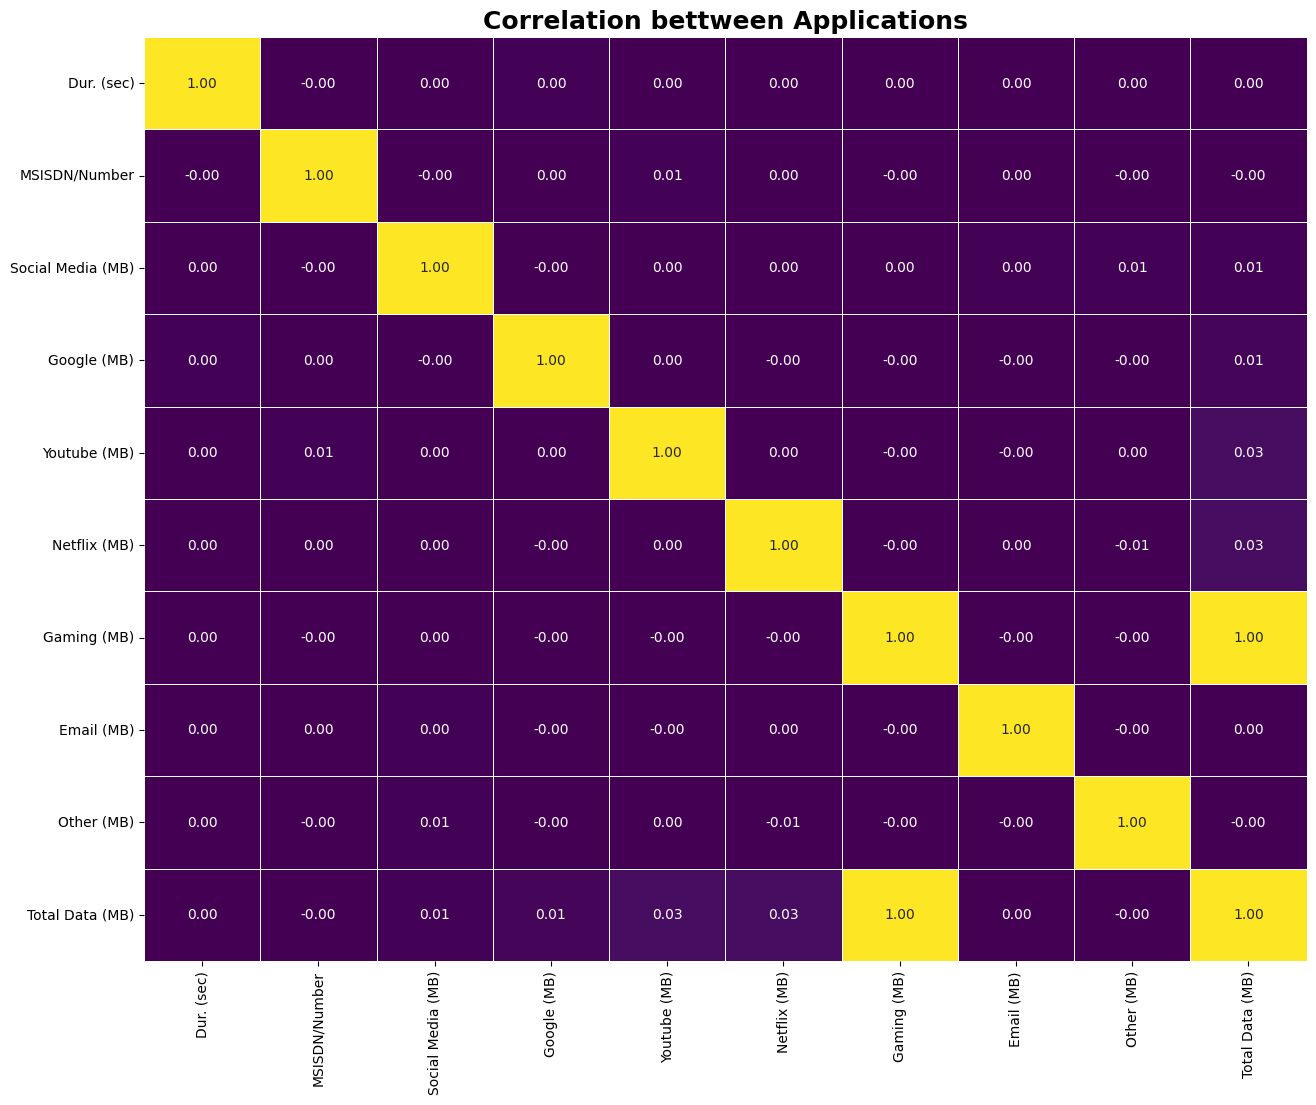

In [45]:
correlation = explore_feature_df.corr()
plots.plot_heatmap(correlation, 'Correlation bettween Applications')

#### Variable Transformation

In [46]:
scaled_explore_feature_df = explore_feature_df[['MSISDN/Number', 'Total Data (MB)', 'Dur. (sec)']]

scaled_explore_feature_df['Dur. (sec)'] = explore_feature_df['Dur. (sec)']/1000
scaled_explore_feature_df = scaled_explore_feature_df.rename(columns={'Dur. (sec)': 'Duration'})

scaled_explore_feature_df_agg = scaled_explore_feature_df.groupby('MSISDN/Number').agg({'Duration':'sum', 'Total Data (MB)': 'sum'})

deciles = pd.qcut(scaled_explore_feature_df_agg['Duration'], 5, labels=["1st_decile", "2nd_decile",
                                                      "3rd_decile", "4th_decile",
                                                      "5th_decile"])



explore_feature_df_with_decile = scaled_explore_feature_df_agg.copy()

explore_feature_df_with_decile['Decile'] = deciles

explore_feature_df_with_decile_agg = explore_feature_df_with_decile.groupby('Decile').agg({'Total Data (MB)': 'sum',
                                                                                           'Duration': 'sum'})
explore_feature_df_with_decile_agg



,Total Data (MB),Duration
Decile,,
1st_decile,11107846.03,251.12
2nd_decile,10861414.40,543.99
3rd_decile,11873945.26,725.71
4th_decile,13863285.32,1045.89
5th_decile,26169272.32,1881.90


<Figure size 1000x700 with 0 Axes>

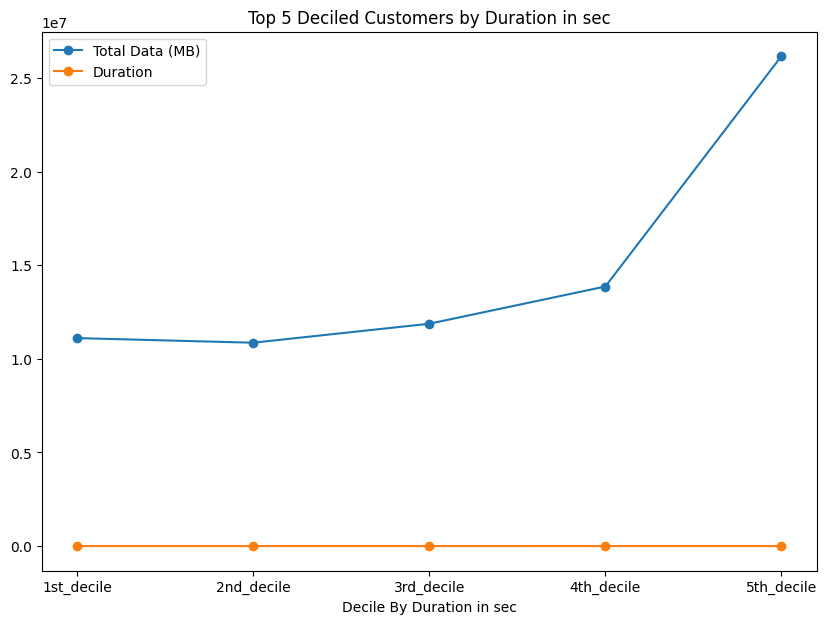

In [47]:
plt.figure(figsize=(10,7))
explore_feature_df_with_decile_agg.plot(linestyle='-', marker='o', figsize=(10,7), title='Top 5 Deciled Customers by Duration in sec').set_xlabel("Decile By Duration in sec")
plt.xticks(np.arange(len(explore_feature_df_with_decile_agg.index)), explore_feature_df_with_decile_agg.index)

plt.show()

In [48]:
# Remove outliers from cleaned dataset duration column too

cleaned_data["Dur. (ms)"] = plots.fix_outlier(cleaned_data, "Dur. (ms)")

In [49]:
#  Replace the space and backslash with underscore

cleaned_data.columns = cleaned_data.columns.str.replace(" ", "_") 
cleaned_data.rename(columns={'MSISDN/Number':'MSISDN_Number'}, inplace=True)

In [50]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149001 entries, 0 to 149000
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed:_0                      149001 non-null  int64  
 1   Bearer_Id                       149001 non-null  float64
 2   Start                           149001 non-null  object 
 3   Start_ms                        149001 non-null  float64
 4   End                             149001 non-null  object 
 5   End_ms                          149001 non-null  float64
 6   Dur._(ms)                       149001 non-null  float64
 7   IMSI                            149001 non-null  float64
 8   MSISDN_Number                   149001 non-null  float64
 9   IMEI                            149001 non-null  float64
 10  Last_Location_Name              149001 non-null  object 
 11  Avg_RTT_DL_(ms)                 149001 non-null  float64
 12  Avg_RTT_UL_(ms) 

In [57]:
cleaned_data.to_csv("/Users/user/Desktop/Aca/teleco/data/cleaned_dataset.csv")